In [1]:
#importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder

#lendo os arquivos e armazenando nas variaveis df_treino e df_teste
df_treino =  pd.read_csv('train.csv')
df_teste = pd.read_csv('test.csv')

#definindo as variaveis categoricas e numericas
var_categorica = df_treino.select_dtypes(include=['object']).columns
var_numerica = df_treino._get_numeric_data().columns

#criando um dicionario dict_nulos e armazenando nele a contagem dos valores nulos e df_treinos
dict_nulos = {}
for i in df_treino.columns:
    dict_nulos[i] = df_treino[i].isnull().sum()
df_treino_nulos = pd.DataFrame(data=list(dict_nulos.values()), index=list(dict_nulos.keys()), columns=['nulls'])

#substituindo os valores nulos pela moda e media nas variaveis 
for i in var_categorica:
    if i != 'Name':
        df_treino[i] = df_treino[i].fillna(df_treino[i].mode()[0])

for i in var_numerica:
    df_treino[i] = df_treino[i].fillna(df_treino[i].mean())

#dropando a coluna 'Name' do data frame
df_treino.drop(['Name'], axis=1, inplace=True)

#tratando e dropando a coluna 'Cabin' e 'HomePlanet'  
df_treino['Deck'] = df_treino['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M')
df_treino['Port'] = df_treino['Cabin'].apply(lambda s: s[-1] if pd.notnull(s) else 'M')
df_treino['Deck'] = df_treino['Deck'].map({'B':0, 'F':1, 'A':2, 'G':3, 'E':4, 'D':5, 'C':6, 'T':7}).astype(int)
df_treino['Port'] = df_treino['Port'].map({'P':0, 'S':1}).astype(int)
df_treino['HomePlanet'] = df_treino['HomePlanet'].map({'Earth':0, 'Europa':1, 'Mars':2}).astype(int)
df_treino.drop(['Cabin'], axis=1, inplace=True)

#dropando 'PassenderId' do data frame
if 'train' in 'train.csv':
    df_treino.drop(['PassengerId'], axis=1, inplace=True)

#mapeando os valores unicos em 'VIP', 'CryoSleep', 'Destination' e armazenando para cada variavel respectivamente 
if 'VIP' in df_treino.columns:
    vip_unico = df_treino['VIP'].unique()
    df_treino['VIP'] = df_treino['VIP'].map(dict(zip(vip_unico, list(range(len(vip_unico)))))).astype(int)

if 'CryoSleep' in df_treino.columns:
    cryosleep_unico = df_treino['CryoSleep'].unique()
    df_treino['CryoSleep'] = df_treino['CryoSleep'].map(dict(zip(cryosleep_unico, list(range(len(cryosleep_unico)))))).astype(int)

if 'Destination' in df_treino.columns:
    destination_unico = df_treino['Destination'].unique()
    df_treino['Destination'] = df_treino['Destination'].map(dict(zip(destination_unico, list(range(len(destination_unico)))))).astype(int)

#preparando o modelo e dropando a coluna 'Transported' 
X = df_treino.drop('Transported', axis=1)
y = df_treino['Transported']

#codificando as variaveis categoricas no data frame X
var_categorica_colunas = X.select_dtypes(include='object').columns
codificador = OneHotEncoder(drop='first', sparse=False)
X_codificado = codificador.fit_transform(X[var_categorica_colunas])
X_codificado = pd.DataFrame(X_codificado, columns=var_categorica_colunas)
X = pd.concat([X.drop(var_categorica_colunas, axis=1), X_codificado], axis=1)

#dividindo o data frame em conjuntos de treinamento e teste 
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

#instanciado os modelos LogisticRegression(), RandomForestClassifier(), GradientBoostingClassifier()
lg = LogisticRegression()
lg.fit(X_treino, y_treino)
lg_score = lg.score(X_teste, y_teste)

rf = RandomForestClassifier()
rf.fit(X_treino, y_treino)
rf_score = rf.score(X_teste, y_teste)

gb = GradientBoostingClassifier()
gb.fit(X_treino, y_treino)
gb_score = gb.score(X_teste, y_teste)

#vizualizando a acuracia dos modelos  
resultados = pd.DataFrame(dict(model=['Logistic Regression', 'Random Forest', 'Gradient Boosting'],accuracy=[lg_score,rf_score, gb_score]))

c:\Users\matheusfonseca\AppData\Local\Anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\matheusfonseca\AppData\Local\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [2]:
resultados

,model,accuracy
0,Logistic Regression,0.775733
1,Random Forest,0.783209
2,Gradient Boosting,0.785509


(0.5, 1.0)

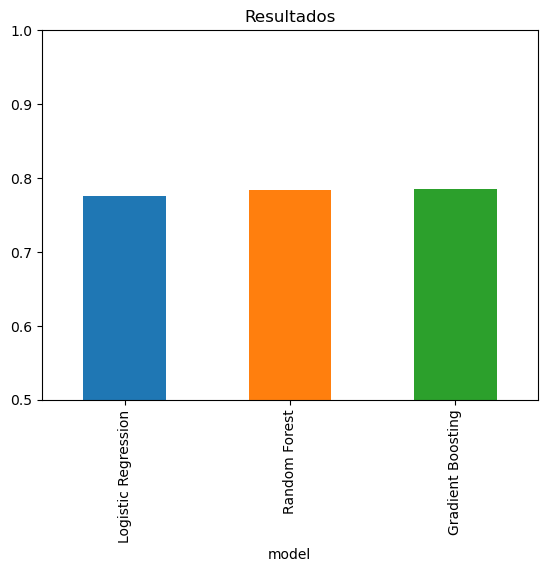

In [3]:
resultados.plot(kind='bar', x='model', y='accuracy', title='Resultados', legend=False, color=['#1F77B4', '#FF7F0E', '#2CA02C'])
plt.ylim(0.5, 1)